In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
from scipy import integrate
import AnimGIF as anim
from celluloid import Camera
from mpl_toolkits.mplot3d import Axes3D
import gravSolve as gs

In [62]:
#initial conditions, in units where G=1
G = 1 
M1 = 1
M2 = 1
M3 = 100
a = 1 

#kepler's laws
a1=a*M2/(M1+M2)
a2=a*M1/(M1+M2)
P=2.0*np.pi*np.sqrt(a**3/(G*(M1+M2)))
v1=2.0*np.pi*a1/P
v2=2.0*np.pi*a2/P


body1Pos = [a1,0,0] #(x,y,z)
body1Velo = [0,v1,0] #(vx,vy,vz)

body2Pos = [-a2,0,0] #(x,y,z)
body2Velo = [0,-v2,0] #(vx,vy,vz)

body3Pos = [0,0,0]
body3Velo = [0,0,0]

In [63]:
# P = 21.270975
# p1 = 0.080584
# p2 = 0.588836
# M1 = 1
# M2 = 5
# M3 = 1

# body1Pos = [-1,0,0]
# body1Velo = [p1,p2,0]

# body2Pos = [1,0,0]
# body2Velo = [p1,p2,0]

# body3Pos = [0,0,0]
# body3Velo = [-2*p1,-2*p2,0]

In [77]:
tarr=np.linspace(0.0, P, 2000)
mass = np.array([M1,M2, M3])
pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
v0 = np.array([pos, velo]).flatten()

In [78]:
result2=integrate.odeint(gs.df_Nbody,v0,tarr,args=(mass,))
x1=result2[0:,0]
y1=result2[0:,1]
z1=result2[0:,2]

x2=result2[0:,3]
y2=result2[0:,4]
z2=result2[0:,5]

x3=result2[0:,6]
y3=result2[0:,7]
z3=result2[0:,8]

vx1=result2[0:,9]
vy1=result2[0:,10]
vz1=result2[0:,11]

vx2=result2[0:,12]
vy2=result2[0:,13]
vz2=result2[0:,14]

vx3=result2[0:,15]
vy3=result2[0:,16]
vz3=result2[0:,17]

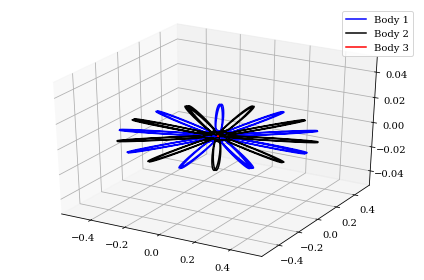

In [79]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(x1,y1, z1, 'b', label="Body 1")
ax3.plot(x2,y2, z2, 'k', label="Body 2")
ax3.plot(x3,y3, z3, 'r',label="Body 3")
plt.legend(loc='best')
plt.grid()
plt.show()

In [81]:
body1 = np.array([x1,y1,z1])
body2 = np.array([x2,y2,z2])
body3 = np.array([x3,y3,z3])

In [ ]:
anim.movie(tarr,body1,body2,body3,tail=3,xmax=3,out='testlims.gif')